## Costos - Fabricación
---

A partir de los costos de fabricación de 4.000 mesas que se detallan:


- Materia prima directa: $100.000
- Mano de obra directa: $80.000
- Mano de obra indirecta: $10.000
- Materiales indirectos: $4.000
- Gastos de administración: $2.000
- Fuerza motriz: $11.000
- Depreciación de herramientas: $3.000
- Depreciación de edificios Dpto.Producción: $2.000
- Depreciación de maquinaria: $4.000
- Seguros de fábrica: $4.000
- Otros CIF: $4.000

---

#### Importación de librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


import numpy as np

from matplotlib import cm
import matplotlib.patches as mpatches

In [2]:
# Configuración de estilo para los gráficos
plt.style.use('default')

#### Definición de datos

In [3]:
# Datos proporcionados
datos = {
    "Costos Directos": {
        "Materia prima directa": 100000,
        "Mano de obra directa": 80000
    },
    "Costos Indirectos de Fabricación": {
        "Mano de obra indirecta": 10000,
        "Materiales indirectos": 4000,
        "Fuerza motriz": 11000,
        "Depreciación de herramientas": 3000,
        "Depreciación de edificios Dpto. Producción": 2000,
        "Depreciación de maquinaria": 4000,
        "Seguros de fábrica": 4000,
        "Otros CIF": 4000
    },
    "Gastos de Administración": {
        "Gastos de administración": 2000
    },
    "Producción": {
        "Unidades producidas": 4000
    }
}

In [4]:
# Cálculos
# Costo Primo
costo_primo = datos["Costos Directos"]["Materia prima directa"] + datos["Costos Directos"]["Mano de obra directa"]

# CIF Total
cif_total = sum(datos["Costos Indirectos de Fabricación"].values())

# Costo de Conversión
costo_conversion = datos["Costos Directos"]["Mano de obra directa"] + cif_total

# Costo de Producción Total
costo_produccion = costo_primo + cif_total

# Costo Unitario
costo_unitario = costo_produccion / datos["Producción"]["Unidades producidas"]

In [5]:
# Crear DataFrames para mostrar los datos
df_directos = pd.DataFrame(list(datos["Costos Directos"].items()), columns=['Concepto', 'Monto'])
df_cif = pd.DataFrame(list(datos["Costos Indirectos de Fabricación"].items()), columns=['Concepto', 'Monto'])
df_gastos = pd.DataFrame(list(datos["Gastos de Administración"].items()), columns=['Concepto', 'Monto'])

In [6]:
# Crear DataFrame con los resultados
resultados = {
    'Concepto': [
        'Costo Primo',
        'Costo de Conversión',
        'Costo de Producción Total',
        'Costo Unitario de Producción'
    ],
    'Monto': [
        costo_primo,
        costo_conversion,
        costo_produccion,
        costo_unitario
    ]
}

df_resultados = pd.DataFrame(resultados)

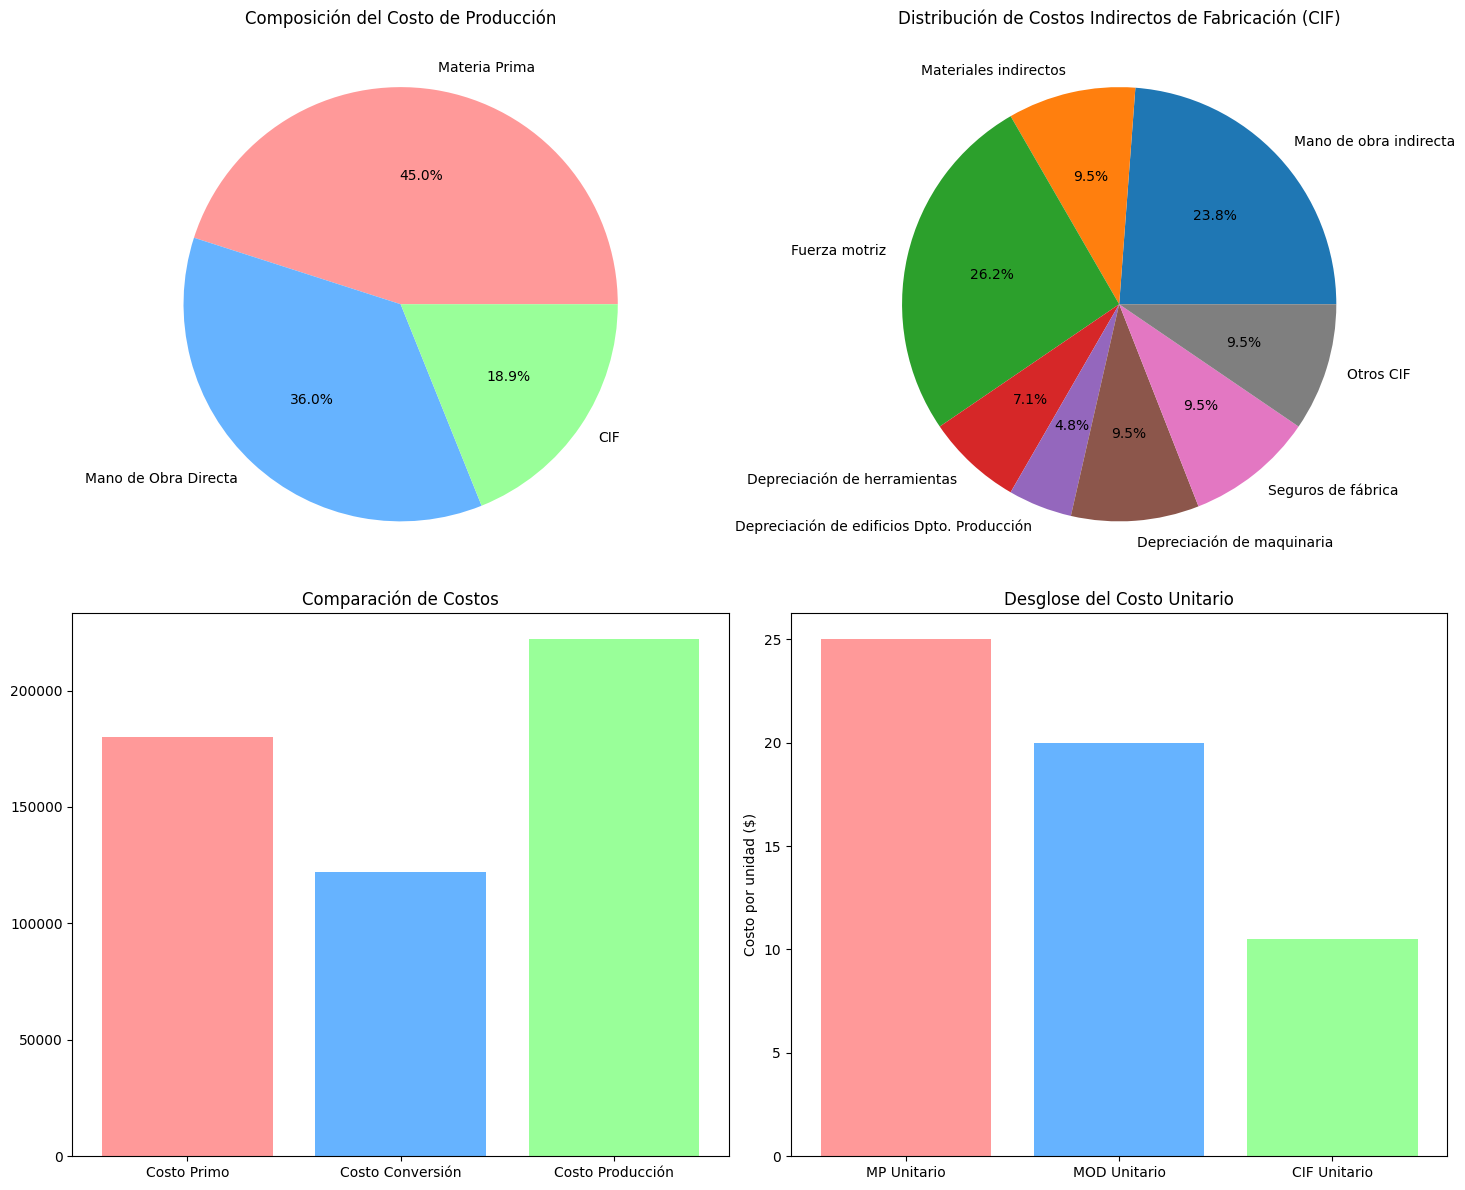

In [10]:
# Crear gráficos
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Gráfico 1: Composición del Costo de Producción
componentes_produccion = ['Materia Prima', 'Mano de Obra Directa', 'CIF']
valores_produccion = [
    datos["Costos Directos"]["Materia prima directa"],
    datos["Costos Directos"]["Mano de obra directa"],
    cif_total
]
colors = ['#ff9999', '#66b3ff', '#99ff99']
ax1.pie(valores_produccion, labels=componentes_produccion, autopct='%1.1f%%', colors=colors)
ax1.set_title('Composición del Costo de Producción')

# Gráfico 2: Distribución de CIF
conceptos_cif = list(datos["Costos Indirectos de Fabricación"].keys())
valores_cif = list(datos["Costos Indirectos de Fabricación"].values())
ax2.pie(valores_cif, labels=conceptos_cif, autopct='%1.1f%%')
ax2.set_title('Distribución de Costos Indirectos de Fabricación (CIF)')

# Gráfico 3: Comparación de Costos
costos_comparacion = ['Costo Primo', 'Costo Conversión', 'Costo Producción']
valores_comparacion = [costo_primo, costo_conversion, costo_produccion]
colors_comparacion = ['#ff9999', '#66b3ff', '#99ff99']
ax3.bar(costos_comparacion, valores_comparacion, color=colors_comparacion)
ax3.set_title('Comparación de Costos')
ax3.ticklabel_format(style='plain', axis='y')

# Gráfico 4: Costo Unitario vs Componentes
componentes_unitarios = ['MP Unitario', 'MOD Unitario', 'CIF Unitario']
valores_unitarios = [
    datos["Costos Directos"]["Materia prima directa"] / datos["Producción"]["Unidades producidas"],
    datos["Costos Directos"]["Mano de obra directa"] / datos["Producción"]["Unidades producidas"],
    cif_total / datos["Producción"]["Unidades producidas"]
]
ax4.bar(componentes_unitarios, valores_unitarios, color=['#ff9999', '#66b3ff', '#99ff99'])
ax4.set_title('Desglose del Costo Unitario')
ax4.set_ylabel('Costo por unidad ($)')

plt.tight_layout()
plt.savefig('graficos_actividad_4.png')
plt.show()


In [14]:
# Mostrar resultados en consola
print("=" * 50)
print("RESULTADOS")
print("=" * 50)
print(f"Costo Primo: ${costo_primo:,.2f}")
print(f"Costo de Conversión: ${costo_conversion:,.2f}")
print(f"Costo de Producción Total: ${costo_produccion:,.2f}")
print(f"Costo Unitario de Producción: ${costo_unitario:,.2f}")
# Mostrar tabla de CIF detallada
print("\n" + "=" * 60)
print("DETALLE DE COSTOS INDIRECTOS DE FABRICACIÓN (CIF)")
print("=" * 60)
for concepto, monto in datos["Costos Indirectos de Fabricación"].items():
    print(f"{concepto:<40} ${monto:>10,.2f}")
print("-" * 60)
print(f"{'TOTAL CIF':<40} ${cif_total:>10,.2f}")

RESULTADOS
Costo Primo: $180,000.00
Costo de Conversión: $122,000.00
Costo de Producción Total: $222,000.00
Costo Unitario de Producción: $55.50

DETALLE DE COSTOS INDIRECTOS DE FABRICACIÓN (CIF)
Mano de obra indirecta                   $ 10,000.00
Materiales indirectos                    $  4,000.00
Fuerza motriz                            $ 11,000.00
Depreciación de herramientas             $  3,000.00
Depreciación de edificios Dpto. Producción $  2,000.00
Depreciación de maquinaria               $  4,000.00
Seguros de fábrica                       $  4,000.00
Otros CIF                                $  4,000.00
------------------------------------------------------------
TOTAL CIF                                $ 42,000.00


In [ ]:
# Exportar a Excel
with pd.ExcelWriter('resultados_actividad_4.xlsx') as writer:
    df_directos.to_excel(writer, sheet_name='Costos_Directos', index=False)
    df_cif.to_excel(writer, sheet_name='Costos_Indirectos', index=False)
    df_gastos.to_excel(writer, sheet_name='Gastos_Administracion', index=False)
    df_resultados.to_excel(writer, sheet_name='Resumen_Resultados', index=False)